In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mount the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Feature Engineering and Model Tuning

### **Data Desription:**

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined by laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative ouput variable, and 1030 instances (observations).

### **Objective:**

Modeling of strength of high performance concrete using Machine Learning

## Steps and tasks:

Import the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the given data

In [4]:
data = pd.read_csv("/content/drive/My Drive/Data/ML Assignment 2021_internshala_Perch Group/Copy of concrete (1).csv")
data.head()   # Reading first five observations (rows) of data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Deliverable -1 (Exploratory data quality report)

#### a. Univariate analysis 

##### Data types 

In [5]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

##### Description of independent variables:

* **Min:** minimum value of variable
* **Max:** maximum value of variable
* **Range:** maximum value - minimum value of variable
* **Mean:** Average value of variable
* **25%:** 25th percentile or 1st quartile of variable
* **50%:** 50th percentile or 2nd quartile or median of variable
* **75%:** 75th percentile or 3rd quartile of variable
* **std:** standard deviation of variable (measure of dispersion) 


In [6]:
data.drop(labels='strength', axis=1).describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


##### Analysis of body of distributions / tails

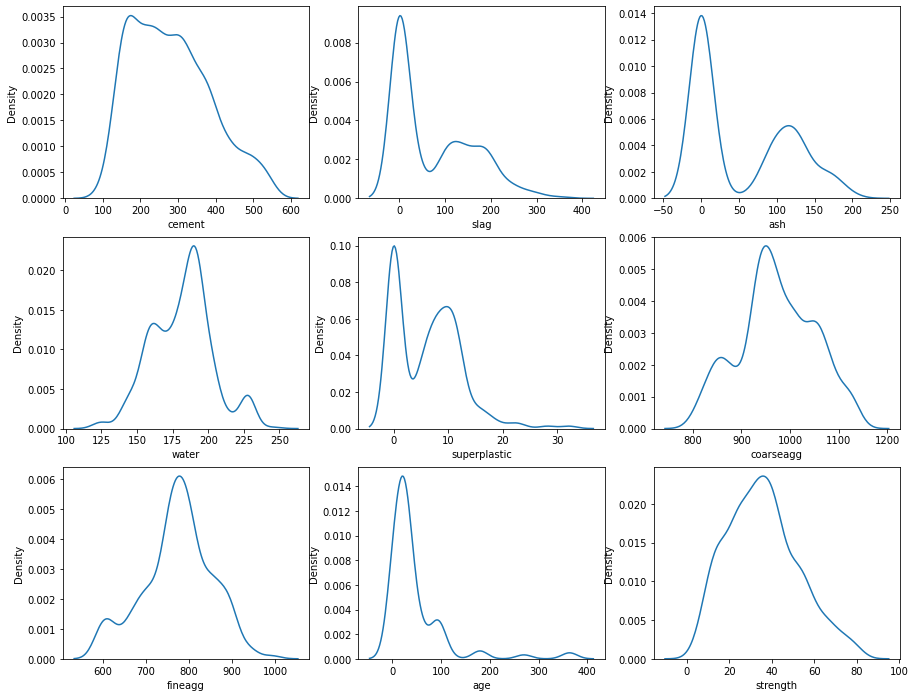

In [7]:
plt.figure(figsize=(15, 12))
for i in range(len(list(data.columns))):
  plt.subplot(3, 3, i+1)
  sns.kdeplot(data[list(data.columns)[i]])

In [8]:
for i in data.columns:
  print("Skewness in {}: {}".format(i, data[i].skew()))

Skewness in cement: 0.5094811788717731
Skewness in slag: 0.8007168956061774
Skewness in ash: 0.5373539058066844
Skewness in water: 0.07462838428549402
Skewness in superplastic: 0.9072025748672466
Skewness in coarseagg: -0.04021974481106704
Skewness in fineagg: -0.25300959769707143
Skewness in age: 3.2691774006345895
Skewness in strength: 0.41697728841071807


##### Analysis of missing values

In [9]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There is no missing values in any of the feature in the given data.

##### Analysis of outliers

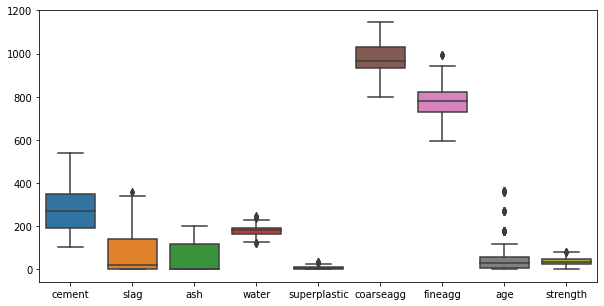

In [10]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data);

Each column except "cement", "ash" & "coarseagg" in the given data has outliers.

#### b. Multivariate analysis

##### Bi-variate analysis between predictor variable and target column

Scatte plot between predictor variable and target column

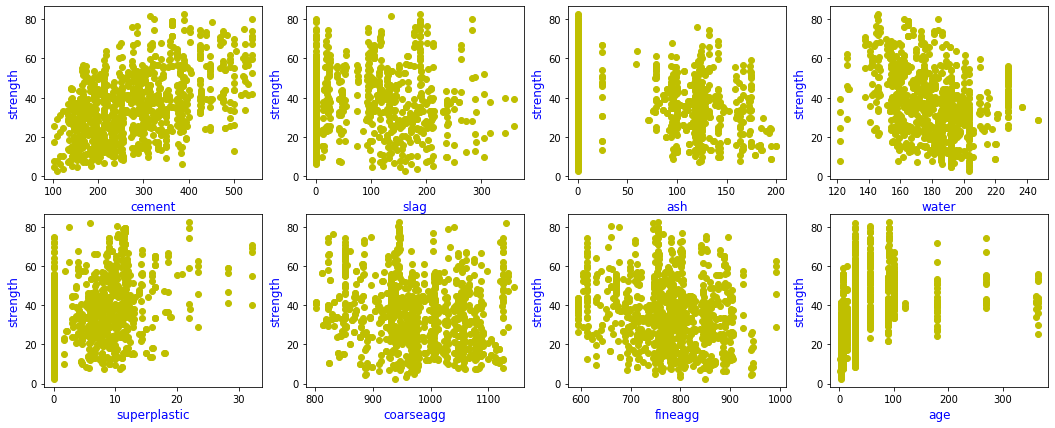

In [11]:
# Make a list of predictor variables
pred = list(data.drop(labels='strength', axis=1).columns)

# plot scatter plot between predictor variables and target column
plt.figure(figsize=(18, 7))
for i in range(len(pred)):
  plt.subplot(2, 4, i+1)
  plt.scatter(data[pred[i]], data['strength'], c='y')
  plt.xlabel(pred[i], fontsize=12, c='b')
  plt.ylabel("strength", fontsize=12, c='b')



Correlation value between predictor columns and target column ('strength')

In [12]:
data.corr()['strength']

cement          0.497832
slag            0.134829
ash            -0.105755
water          -0.289633
superplastic    0.366079
coarseagg      -0.164935
fineagg        -0.167241
age             0.328873
strength        1.000000
Name: strength, dtype: float64

##### Presence of leverage points

##### Visualize the analysis

Density curves of each of column in the given data

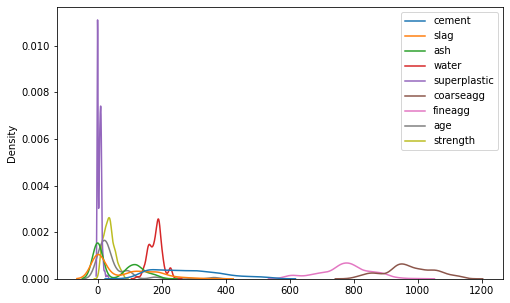

In [13]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data);

Correlation values between the columns of given data

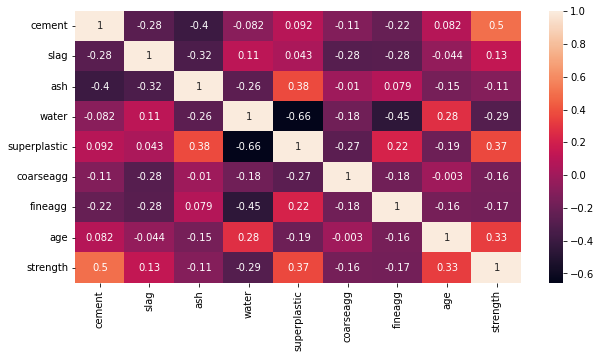

In [14]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);

#### c. Pick one strategy to address the present outliers and missing values and perform necessary imputations

* As there are outliers present in the given data (in independent variables as well as in dependent variable), to address these outliers indepentent variables are transformed using **RobustScaler** and dependent variable is transformed by taking natural logarithm.
 * *RobustScaler* transforms the variable by subtracting the median and then dividing by the **interquartile range**. 
 * *Interquartile range (IQR)*: 3rd quartile (75% value) - 1st quartile (25% value)

* As there are no missing values in the data, there is no need to address them.

In [15]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
X = data.drop(labels='strength', axis=1)
scale.fit(X)
X_scaled = scale.transform(X)
y_scaled = np.log(data['strength'])

In [16]:
X_scaled.shape, y_scaled.shape

((1030, 8), (1030,))

Create a new dataframe after scaling the given data.

In [17]:
import tensorflow as tf
a, b = tf.constant(X_scaled), tf.constant(y_scaled, shape=[1030, 1])
c = tf.concat([a, b], 1)
c.shape, data.shape

(TensorShape([1030, 9]), (1030, 9))

In [18]:
scaled_data = pd.DataFrame(data=c.numpy(), columns=data.columns)

Visualize the given data before and after scaling

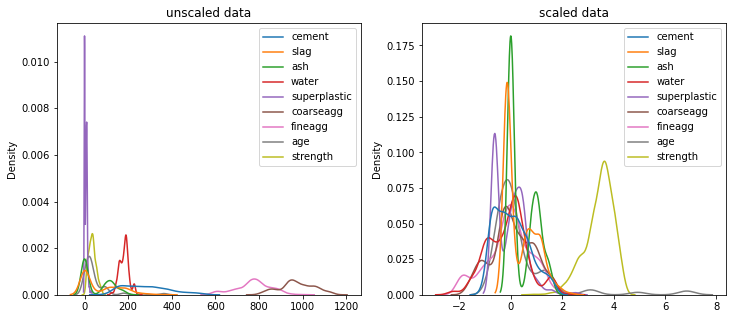

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("unscaled data")
sns.kdeplot(data=data)
plt.subplot(1, 2, 2)
plt.title("scaled data")
sns.kdeplot(data=scaled_data);

### Deliverable -2 (Feature Engineering techniques)

#### a. Identify opportunities (if any) to create composite features, drop a feature etc.

* Since '*coarseagg*' & '*fineagg*' columns have same correlation cofficient and same distribution with respect to '*strength*' column. Hence, these can be combined to a single column (feature).

In [20]:
# Make a dataframe that contains only coarseagg, fineagg & strength features of given data to see the correlation between them.
data_1 = pd.DataFrame({'coarseagg': data['coarseagg'],
              'fineagg': data['fineagg'],
              'strength': data['strength']})
data_1.corr()['strength'].round(3)

coarseagg   -0.165
fineagg     -0.167
strength     1.000
Name: strength, dtype: float64

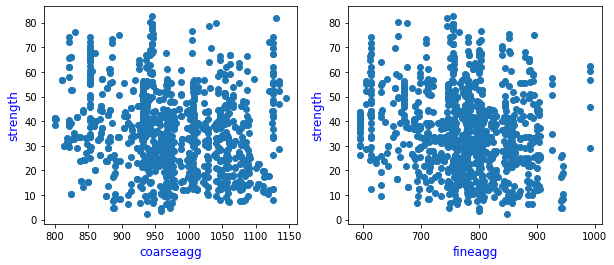

In [21]:
# Plot coarseagg & fineagg distributions with respect to strength column
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(data['coarseagg'], data['strength'])
plt.xlabel('coarseagg', fontsize=12, c='b')
plt.ylabel('strength', fontsize=12, c='b')
plt.subplot(1, 2, 2)
plt.scatter(data['fineagg'], data['strength'])
plt.xlabel('fineagg', fontsize=12, c='b')
plt.ylabel('strength', fontsize=12, c='b');

In [22]:
scaled_data['aggregate'] = scaled_data['coarseagg'] + scaled_data['fineagg']
scaled_data = scaled_data.drop(labels=['coarseagg', 'fineagg'], axis=1)
scaled_data.head()

,cement,slag,ash,water,superplastic,age,strength,aggregate
0,-0.834893,1.329136,0.000000,0.682657,-0.627451,0.000000,3.397524,-0.294140
1,-0.659794,0.141308,1.050719,-0.985240,0.431373,-0.285714,3.157426,1.337584
2,-0.145282,-0.153900,0.808960,0.088561,-0.088235,0.000000,3.374853,0.764060
3,-0.043775,0.643582,0.000000,1.586716,-0.627451,0.000000,3.825375,-1.546397
4,-0.749247,1.129066,0.000000,0.306273,0.264706,0.000000,2.906354,-0.074649


#### b. Decide on complexity of the model

In [23]:
x = scaled_data.drop(labels='strength', axis=1)
y = scaled_data['strength']

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

degree =np.arange(1, 6)
for i in range(len(degree)):
  #plt.subplot(1, len(degree), i+1)
  polynomial_features = PolynomialFeatures(degree=degree[i])
  linear_regression = LinearRegression()

  pipeline = Pipeline([
           ("polynomial_features", polynomial_features),
           ("linear_regression", linear_regression)          
  ])

  pipeline.fit(x, y)

  # Evaluation
  score = cross_val_score(pipeline, x, y, scoring="neg_mean_squared_error", cv=5)
  print("For degree {} MSE: {}".format(degree[i], -score.mean()))

For degree 1 MSE: 0.13638736345710978
For degree 2 MSE: 0.07416773283384162
For degree 3 MSE: 0.05073090532037736
For degree 4 MSE: 0.41101205575328537


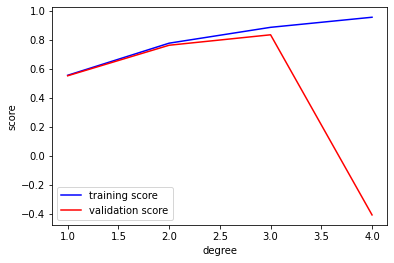

In [51]:
# Plotting
from sklearn.model_selection import validation_curve

train_score, val_score = validation_curve(pipeline, x, y, param_name="polynomial_features__degree", param_range=degree, cv=5)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend()
plt.xlabel("degree")
plt.ylabel("score")
plt.show()


From **cross_val_score** and **validation_curve**, it is clear that as degree becomes higher than 3 **mean squared error** increases. Hence, model should be of 3rd degree.

#### c. Explore for gaussians

### Deliverable -3 (create the model)

#### a. Obtain feature importance for the individual features

### Deliverable -4 (Tuning the model)

#### a. Algorithms that will be suitable for the given project

#### b. Techniques employed to squeeze

#### c. Model performance range at 95% confidence interval